## libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## initialization

In [16]:
STARS_DIRECTORY = Path('../sessions/')

In [17]:
def read_file(filename):
    df = pd.read_csv(filename, delimiter='\\s+')
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(subset = ['phot_g_mean_mag','bp_rp'], inplace = True)
    return df

In [18]:
files = list(STARS_DIRECTORY.glob('**/*_selected_interval'))
files.sort()

In [19]:
filenames = []
for filename, i in zip(files, range(len(files))):
    filenames.append(f"raw_cluster_{filename.stem.split('_selected')[0]}")
    vars()[filenames[i]] = read_file(filename)

## plotting

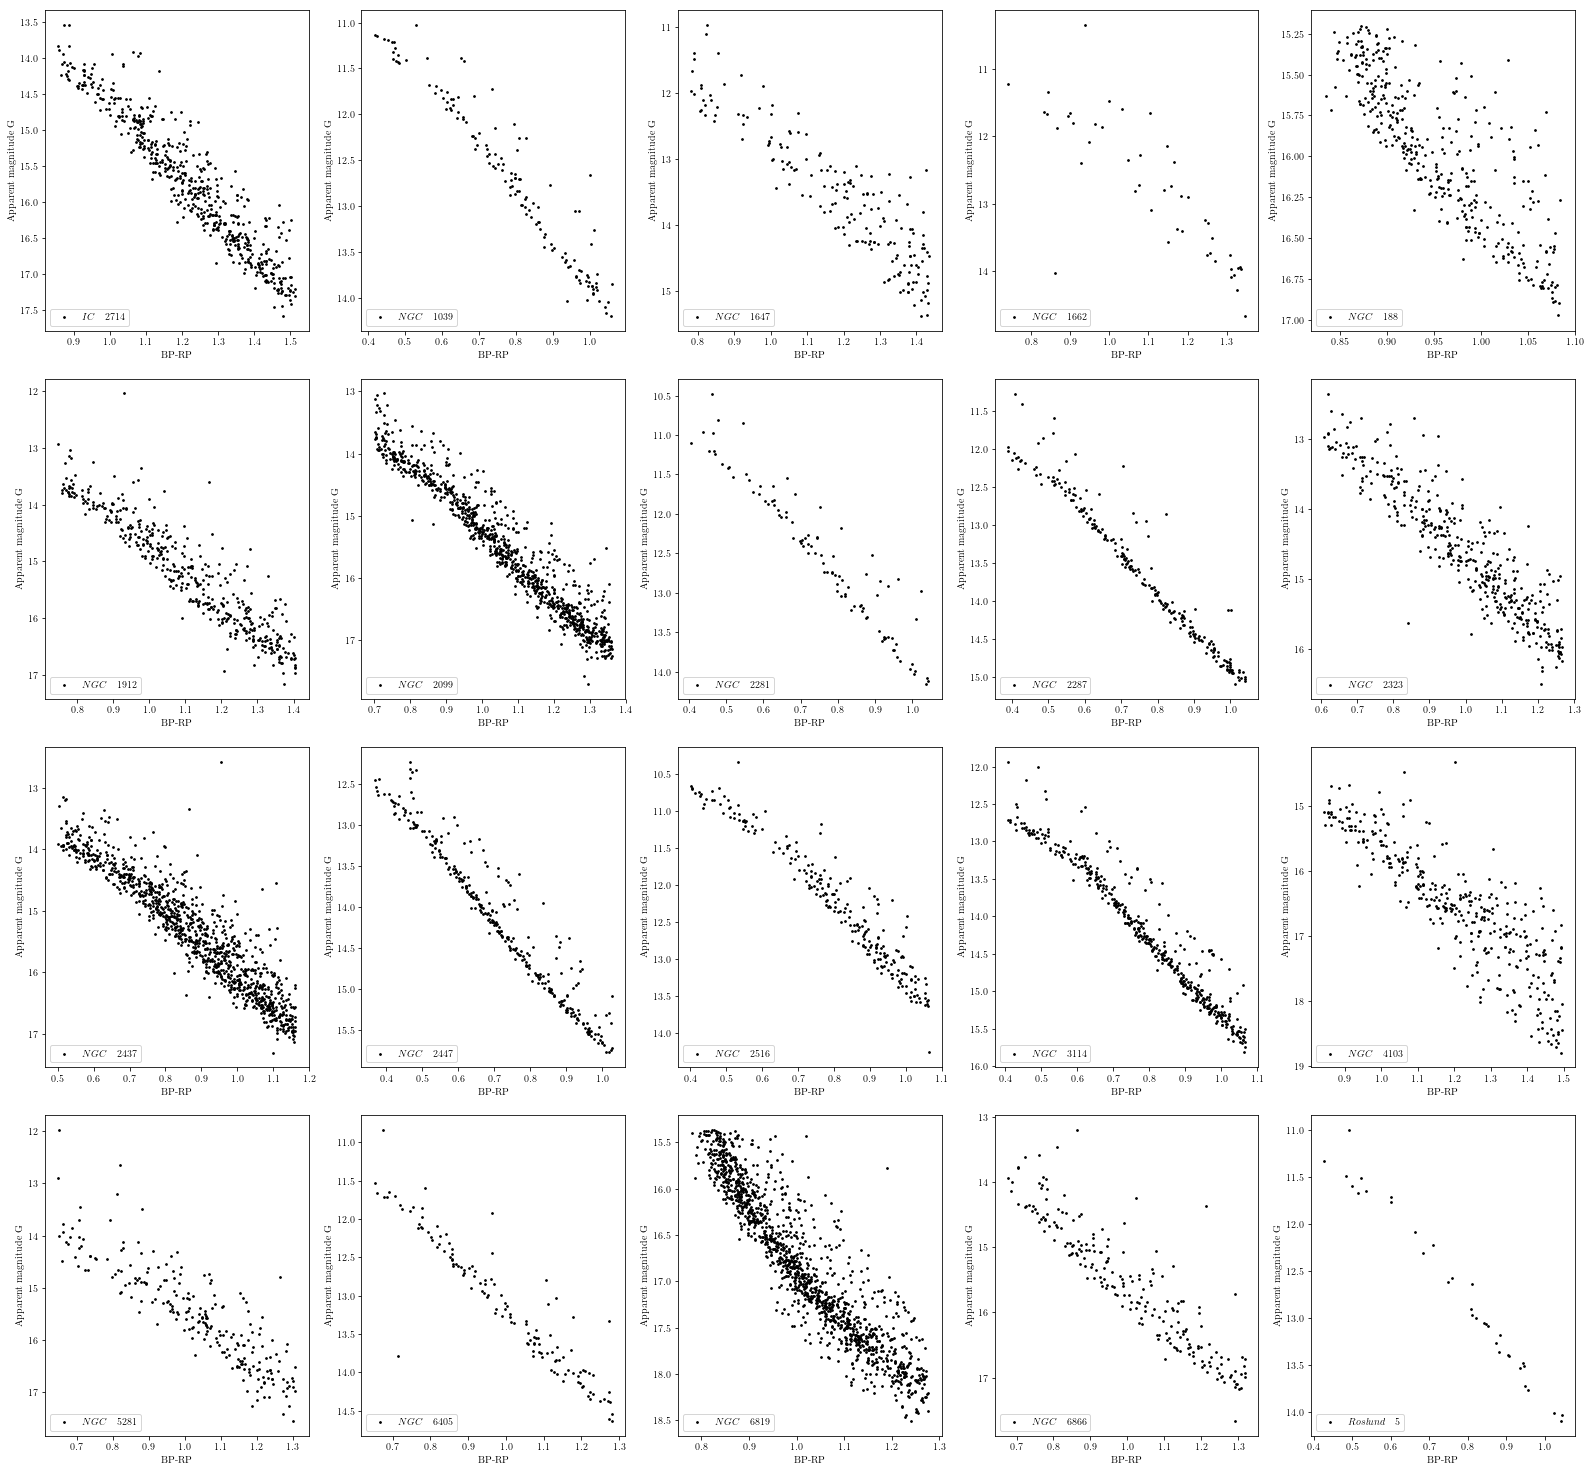

In [20]:
plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 10})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

for i, name_cluster_data in enumerate(filenames):
    plt.subplot(4, 5, i+1)
    cluster_data = vars()[name_cluster_data]
    label = name_cluster_data.split('_selected')[0]
    label = label.split('raw_cluster_')[1]
    label = label.replace('_', '\quad')
    plt.scatter(cluster_data['bp_rp'], cluster_data['phot_g_mean_mag'],
                c='black', s=3, label=f"${label}$")
      
    plt.legend(loc='lower left')
    plt.xlabel('BP-RP')
    plt.ylabel('Apparent magnitude G')
    plt.gca().invert_yaxis()

plt.subplots_adjust(top=1.4, bottom=0.08, left=0.10, right=0.95, hspace=0.15,wspace=0.2)
plt.savefig("CMDs_intervals.pdf", bbox_inches = 'tight')